# PIMA Indians Diabetes Dataset - Data Preprocessing

This notebook performs comprehensive data preprocessing on the PIMA Indians Diabetes dataset including:
- Data loading and inspection
- Missing value detection and handling
- Data cleaning
- Feature normalization
- Saving preprocessed data for model training

# Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

##  Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Dataset

In [18]:
# Load the dataset
df = pd.read_csv('../data/pima-indians-diabetes.csv')

print(f"Dataset shape: {df.shape}")
df.head(10)


Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
5,5,116,74,0,0,25.6,0.20,30,0
6,3,78,50,32,88,31.0,0.25,26,1
7,10,115,0,0,0,35.3,0.13,29,0
8,2,197,70,45,543,30.5,0.16,53,1
9,8,125,96,0,0,0.0,0.23,54,1


In [19]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1
767,1,93,70,31,0,30.4,0.32,23,0


## Dataset Information & Structure

In [20]:
print(f"\nNumber of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")
print("\nData types and non-null counts:")
df.info()


Number of rows: 768
Number of columns: 9

Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Class']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistical Summary

In [ ]:
print("\nDescriptive statistics for all columns:")
df.describe().T

STATISTICAL SUMMARY

Descriptive statistics for all columns:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
Pedigree,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Class,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


**Observations -**
* We have data of women with an average of 4 pregnancies.
* Variables like Glucose, BloodPressure, SkinThickness, and Insulin have minimum values of 0 which might be data input errors and we should explore it further.
* There is a large difference between the 3rd quartile and maximum value for variables like SkinThickness, Insulin, and Age which suggest that there might be outliers present in the data.
* The average age of women in the data is 33 years.

## Univariate Analysis

In [26]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Pregnancies

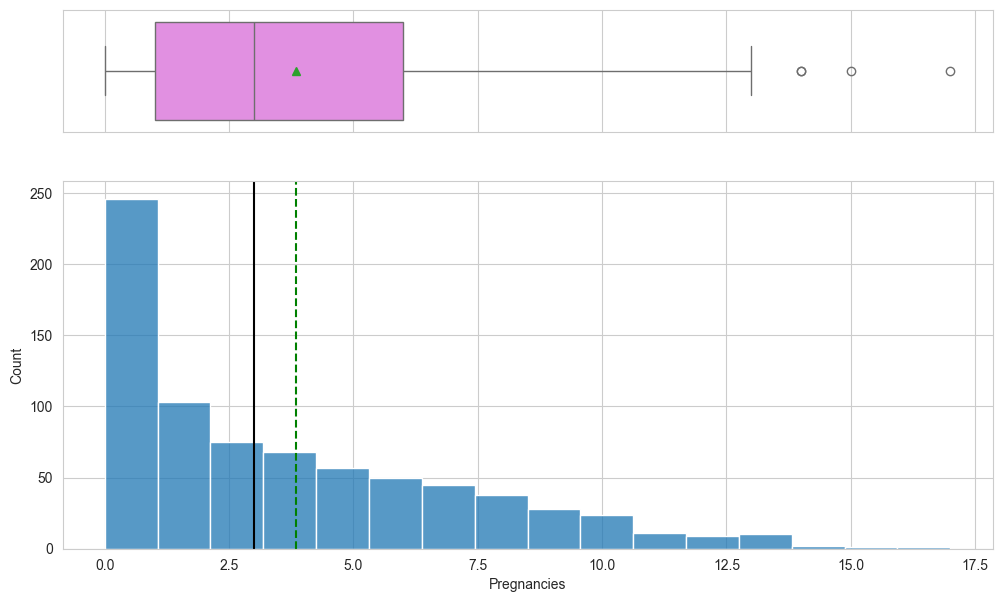

In [27]:
histogram_boxplot(df, "Pregnancies")

* The distribution of the number of pregnancies is right-skewed.
* The boxplot shows that there are few outliers to the right for this variable.
* From the boxplot, we can see that the third quartile (Q3) is approximately equal to 6 which means 75% of women have less than 6 pregnancies and an average of 4 pregnancies.

### Observations on Glucose

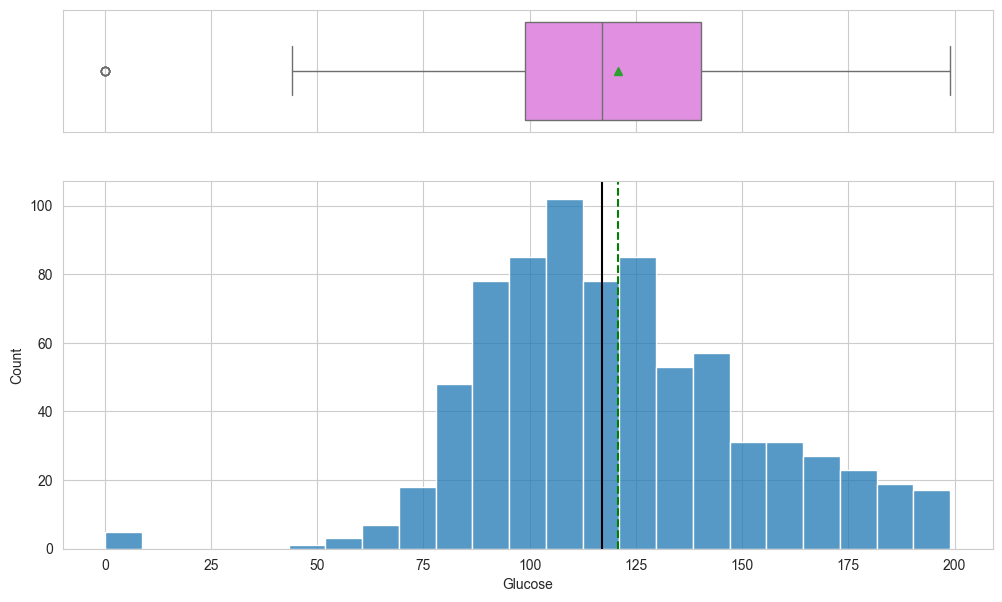

In [28]:
histogram_boxplot(df,"Glucose")

* The distribution of plasma glucose concentration looks like a bells-shaped curve i.e. fairly normal.
* The boxplot shows that 0 value is an outlier for this variable - but a 0 value of Glucose concentration is not possible we should treat the 0 values as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 140 which means 75% of women have less than 140 units of plasma glucose concentration.

### Observations on BloodPressure

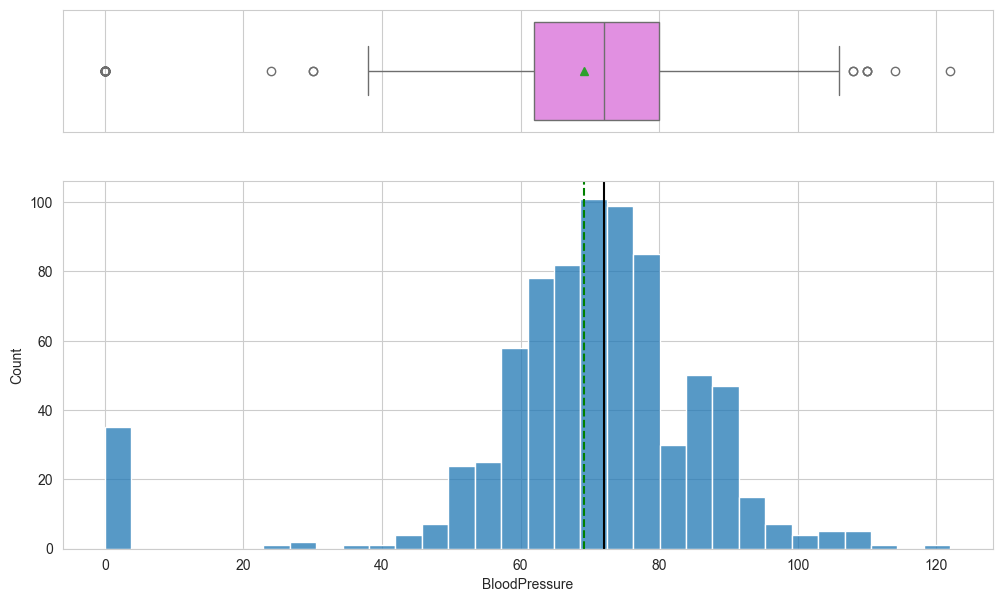

In [29]:
histogram_boxplot(df,"BloodPressure")

* The distribution for blood pressure looks fairly normal except few outliers evident from the boxplot.
* We can see that there are some observations with 0 blood pressure - but a 0 value of blood pressure is not possible and we should treat the 0 value as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 80 mmHg which means 75% of women have less than 80 mmHg of blood pressure and average blood pressure of 69 mmHg. We can say that most women have normal blood pressure.

### Observations on SkinThickness

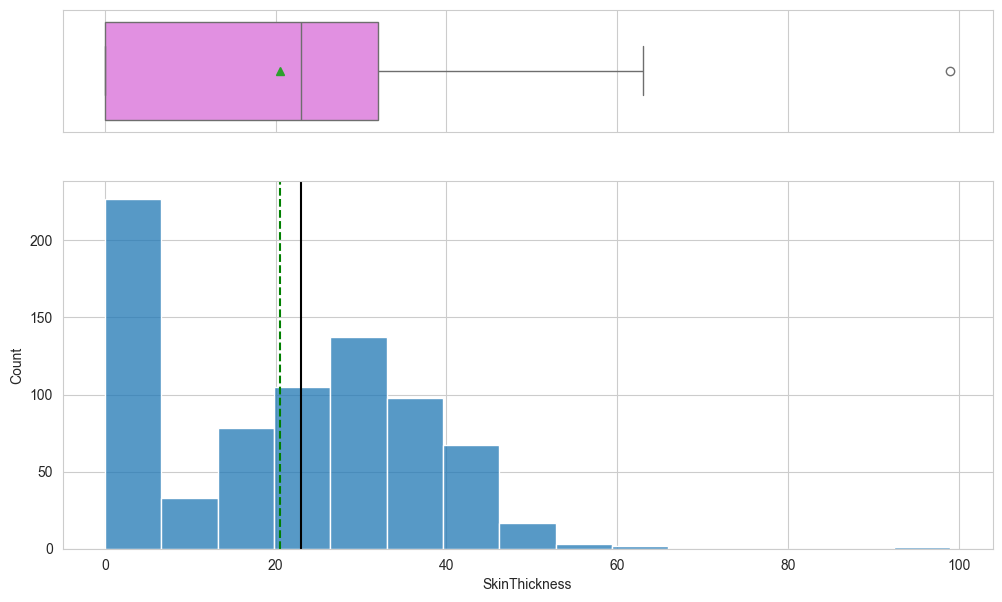

In [30]:
histogram_boxplot(df,"SkinThickness")

In [31]:
df[df['SkinThickness']>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
579,2,197,70,99,0,34.7,0.57,62,1


* There is one extreme value of 99 in this variable. 
* There are much values with 0 value of skin thickness but a 0 value of skin thickness is not possible and we should treat the 0 values as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 32 mm, which means 75% of women have less than 32 mm of skin thickness and an average skin thickness of 21 mm.

### Observations on Insulin

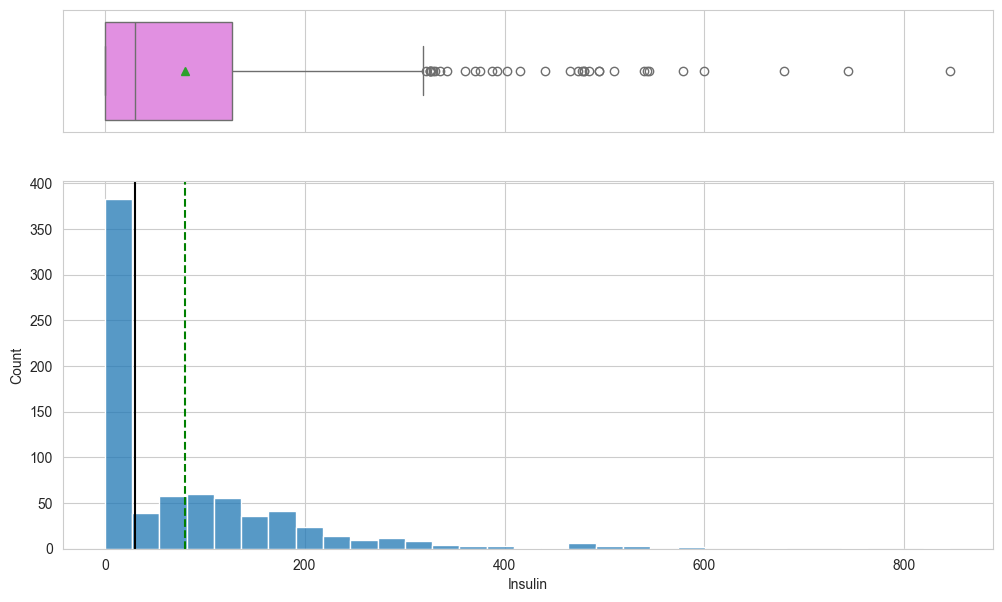

In [32]:
histogram_boxplot(df,"Insulin")

* The distribution of insulin is right-skewed.
* There are some outliers to the right in this variable.
* A 0 value in insulin is not possible. We should treat the 0 values as missing data.
* From the boxplot, we can see that the third quartile (Q3) is equal to 127 mu U/ml, which means 75% of women have less than 127 mu U/ml of insulin concentration and an average of 80 mu U/ml.

### Observations on BMI

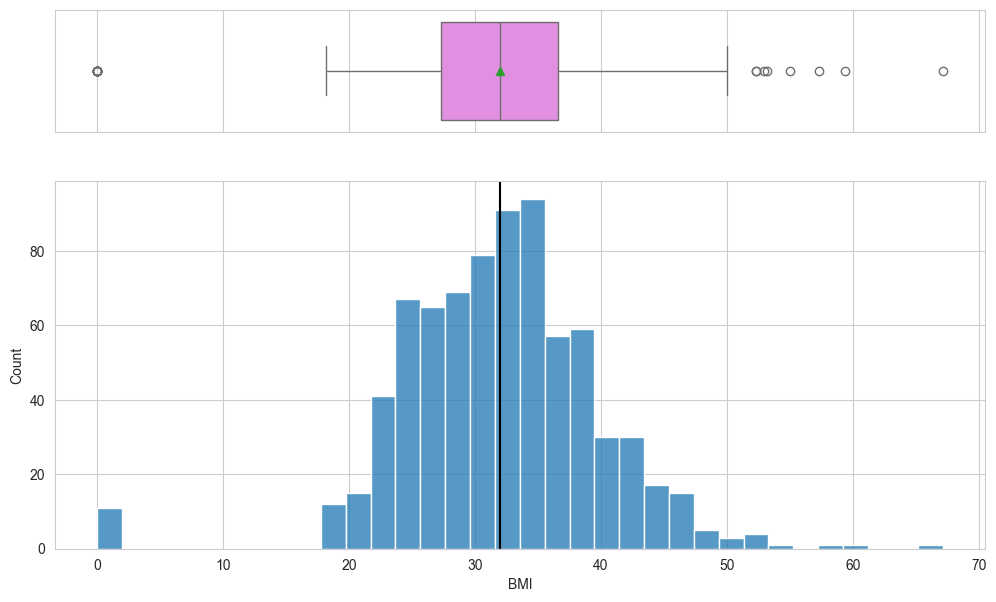

In [33]:
histogram_boxplot(df,"BMI")

* The distribution of mass looks normally distributed with the mean and median of approximately 32.
* There are some outliers in this variable.
* A 0 value in mass is not possible we should treat the 0 values as missing data.

### Observations on Pedigree

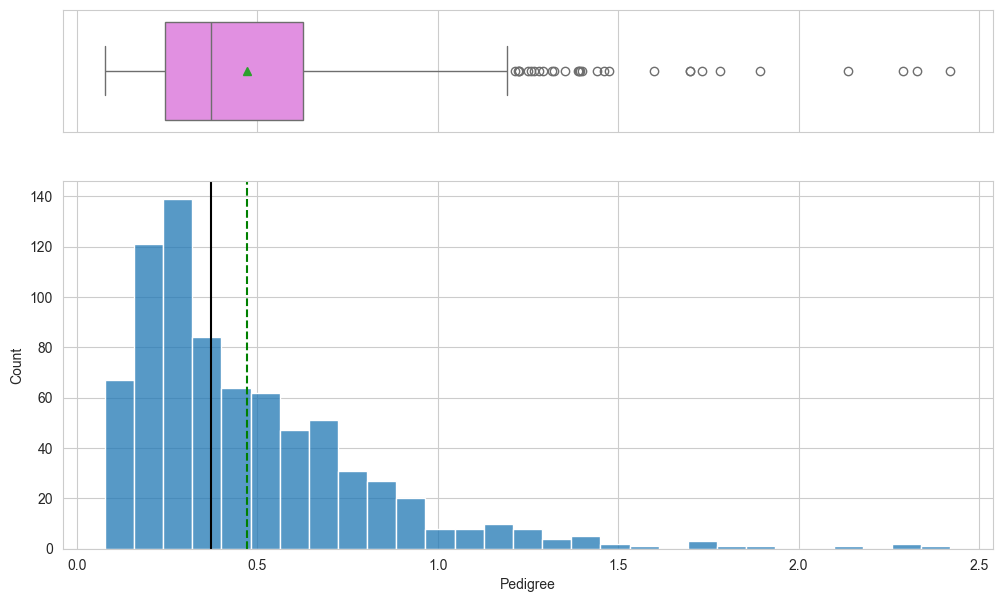

In [34]:
histogram_boxplot(df,"Pedigree")

* The distribution is skewed to the right and there are some outliers in this variable.
* From the boxplot, we can see that the third quartile (Q3) is equal to 0.62 which means 75% of women have less than 0.62 diabetes pedigree function value and an average of 0.47.

### Observations on Age

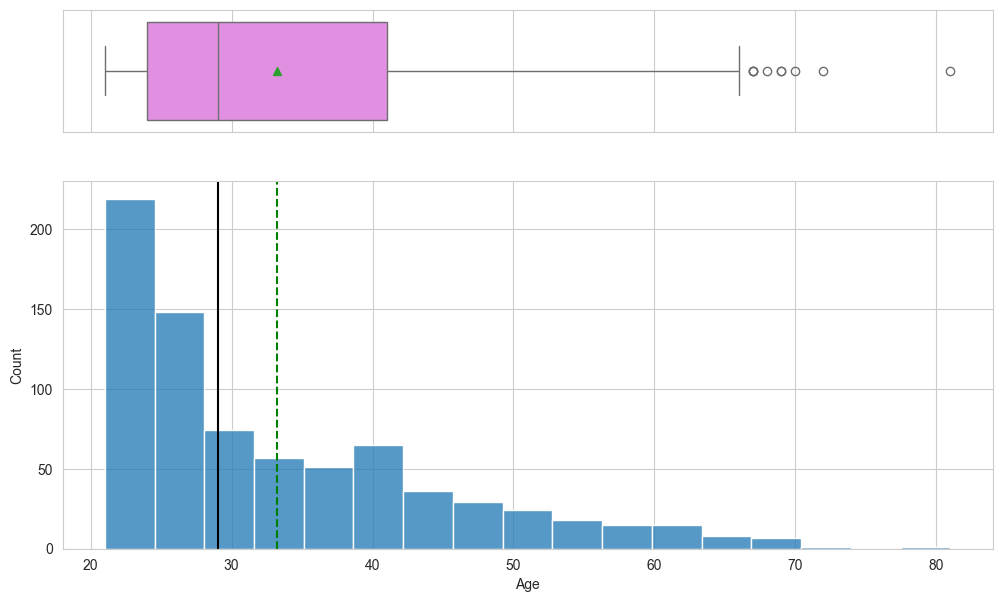

In [35]:
histogram_boxplot(df,"Age")

* The distribution of age is right-skewed.
* There are outliers in this variable.
* From the boxplot, we can see that the third quartile (Q3) is equal to 41 which means 75% of women have less than 41 age in our data and the average age is 33 years.

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Class

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_86198/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


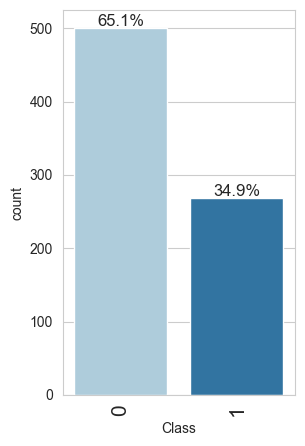

In [38]:
labeled_barplot(df,"Class",perc=True)

* The data is slightly imbalanced as there are only ~35% of the women in data who are diabetic and ~65% of women who are not diabetic.

### Observations on Preg

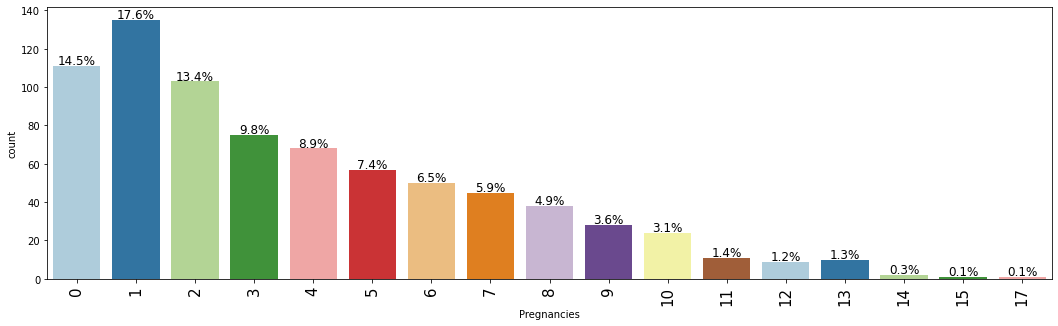

In [ ]:
labeled_barplot(data,"Pregnancies",perc=True)

* The most common number of pregnancies amongst women is 1.
* Surprisingly, there are many observations with more than 10 pregnancies.

## Check for Missing Values

### Important Note:
In the PIMA dataset, zero values in certain medical measurements are biologically impossible and represent missing data:
- **Glucose**: Zero is impossible (normal range: 70-125 mg/dL)
- **BloodPressure**: Zero is impossible (normal range: 60-80 mmHg diastolic)
- **SkinThickness**: Zero likely represents missing data
- **Insulin**: Zero likely represents missing data
- **BMI**: Zero is impossible (normal range: 18.5-40)

MISSING VALUE ANALYSIS

  NULL/NaN values:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

 Implicit missing values (zeros in medical measurements):
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)

3. Visualization of missing data:


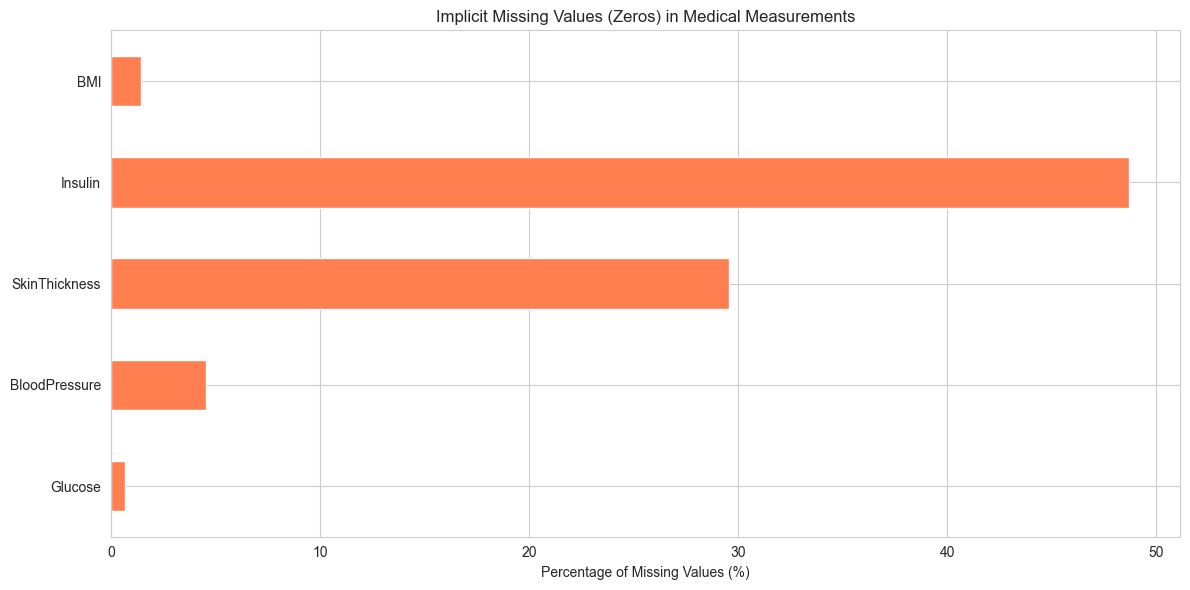

In [ ]:
# Check for explicit null values
print("\n  NULL/NaN values:")
null_counts = df.isnull().sum()
print(null_counts)

# Check for implicit missing values (zeros in medical measurements)
print("\n Implicit missing values (zeros in medical measurements):")
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

missing_data = {}
for col in columns_with_zeros:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    missing_data[col] = {'count': zero_count, 'percentage': zero_percentage}
    print(f"{col}: {zero_count} zeros ({zero_percentage:.2f}%)")

# Visualize missing data
print("\nVisualization of missing data:")
missing_df = pd.DataFrame(missing_data).T
missing_df['percentage'].plot(kind='barh', color='coral')
plt.xlabel('Percentage of Missing Values (%)')
plt.title('Implicit Missing Values (Zeros) in Medical Measurements')
plt.tight_layout()
plt.show()

## Value Counts and Class Distribution

VALUE COUNTS ANALYSIS

1. Target Variable (Class) Distribution:
Class
0    500
1    268
Name: count, dtype: int64

Class distribution percentage:
Class
0    65.1
1    34.9
Name: proportion, dtype: float64


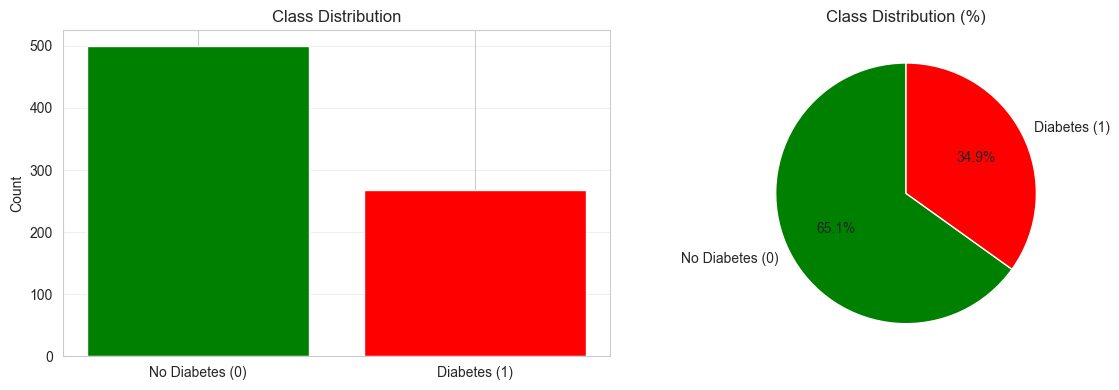


Class imbalance ratio: 0.54
Classes are reasonably balanced


In [ ]:

print("VALUE COUNTS ANALYSIS")

# Target variable distribution
print("\nTarget Variable (Class) Distribution:")
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"\nClass distribution percentage:")
print(df['Class'].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
axes[0].bar(['No Diabetes (0)', 'Diabetes (1)'], class_counts.values, color=['green', 'red'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(class_counts.values, labels=['No Diabetes (0)', 'Diabetes (1)'], 
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Class Distribution (%)')

plt.tight_layout()
plt.show()

# Check for class imbalance
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio < 0.5:
    print("Significant class imbalance detected!")
else:
    print("Classes are reasonably balanced")
    
#a common rule of thumb is that if the minority class represents less than 10–20% of the total samples, 
# the data is often considered imbalanced.

## Data Cleaning - Handle Missing Values

Strategy: Replace zero values with median for each column (median is more robust to outliers than mean)

In [41]:
print("DATA CLEANING")

df_cleaned = df.copy()

# Columns to clean
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\nReplacing zero values with median for each column:")

for col in columns_to_clean:
    # Calculate median of non-zero values
    median_value = df_cleaned[df_cleaned[col] != 0][col].median()
    
    # Count zeros before replacement
    zeros_before = (df_cleaned[col] == 0).sum()
    
    # Replace zeros with median
    df_cleaned[col] = df_cleaned[col].replace(0, median_value)
    
    # Verify replacement
    zeros_after = (df_cleaned[col] == 0).sum()
    
    print(f"{col}:")
    print(f"  - Zeros before: {zeros_before}")
    print(f"  - Median (non-zero): {median_value:.2f}")
    print(f"  - Zeros after: {zeros_after}")



DATA CLEANING

Replacing zero values with median for each column:
Glucose:
  - Zeros before: 5
  - Median (non-zero): 117.00
  - Zeros after: 0
BloodPressure:
  - Zeros before: 35
  - Median (non-zero): 72.00
  - Zeros after: 0
SkinThickness:
  - Zeros before: 227
  - Median (non-zero): 29.00
  - Zeros after: 0
Insulin:
  - Zeros before: 374
  - Median (non-zero): 125.00
  - Zeros after: 0
BMI:
  - Zeros before: 11
  - Median (non-zero): 32.30
  - Zeros after: 0


## 8. Outlier Detection and Analysis

Using box plots and IQR method to identify outliers. Note: Medical data can have legitimate extreme values, so we document but retain outliers.

OUTLIER DETECTION


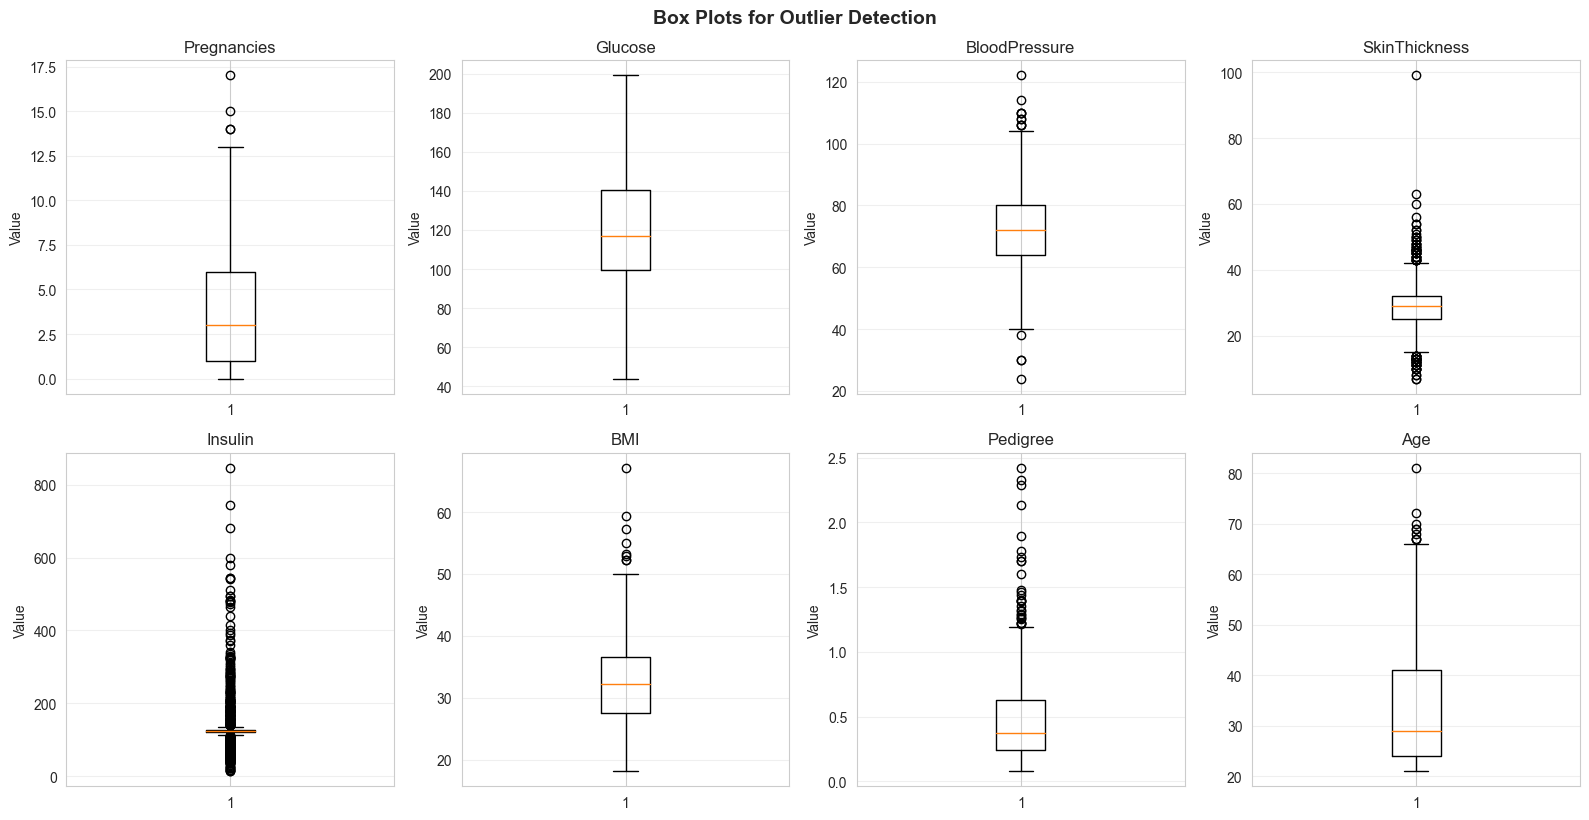


Outlier counts using IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR):
--------------------------------------------------------------------------------
Pregnancies:
  - Range: [-6.50, 13.50]
  - Outliers: 4 (0.52%)
Glucose:
  - Range: [39.00, 201.00]
  - Outliers: 0 (0.00%)
BloodPressure:
  - Range: [40.00, 104.00]
  - Outliers: 14 (1.82%)
SkinThickness:
  - Range: [14.50, 42.50]
  - Outliers: 87 (11.33%)
Insulin:
  - Range: [112.88, 135.88]
  - Outliers: 346 (45.05%)
BMI:
  - Range: [13.85, 50.25]
  - Outliers: 8 (1.04%)
Pedigree:
  - Range: [-0.33, 1.20]
  - Outliers: 29 (3.78%)
Age:
  - Range: [-1.50, 66.50]
  - Outliers: 9 (1.17%)

Note: Outliers are retained as they may represent genuine medical conditions.


In [ ]:
print("OUTLIER DETECTION")

# Select numeric columns (exclude target)
numeric_cols = df_cleaned.columns[:-1].tolist()

# Create box plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df_cleaned[col])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# IQR method for outlier detection
print("\nOutlier counts using IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR):")
print("-" * 80)

outlier_summary = {}
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_cleaned)) * 100
    
    outlier_summary[col] = outlier_count
    
    print(f"{col}:")
    print(f"  - Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers: {outlier_count} ({outlier_percentage:.2f}%)")

print("\nNote: Outliers are retained as they may represent genuine medical conditions.")

## Save Preprocessed Data

In [44]:
# Save the normalized data
output_path = '../data/pima_preprocessed.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"Location: {output_path}")
print(f"Shape: {df_cleaned.shape}")
print(f"Columns: {list(df_cleaned.columns)}")

# Verify the saved file
df_verify = pd.read_csv(output_path)
print(f"Verified shape: {df_verify.shape}")

df_verify.head()

Location: ../data/pima_preprocessed.csv
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Class']
Verified shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,125,33.6,0.63,50,1
1,1,85,66,29,125,26.6,0.35,31,0
2,8,183,64,29,125,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
